# Clustering Shakespeare
Dartmouth College, LING48, Spring 2024<br>
Samuel Peter (samuel.peter.25@dartmouth.edu)

<br>
In this program, I look at Shakespeare's plays and split them into 10 clusters based on content.

##Install necessary packages first

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import gdown
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.sparse import csr_matrix
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

Download Shakespeare text and play names

In [ ]:
# Download Shakespeare files
url = "https://drive.google.com/uc?id=1Z-AZIyDftMdCd-daRvcjaJeTHbZuTVCX"
gdown.download(url, 'shakespeare.txt', quiet=False)
url = "https://drive.google.com/uc?id=19NHhazc-CQuGZQeZizDkv83O_rhxu4PO"
gdown.download(url, 'shakespearePlayTitles.txt', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Z-AZIyDftMdCd-daRvcjaJeTHbZuTVCX
To: /content/shakespeare.txt
100%|██████████| 5.63M/5.63M [00:00<00:00, 36.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=19NHhazc-CQuGZQeZizDkv83O_rhxu4PO
To: /content/shakespearePlayTitles.txt
100%|██████████| 569/569 [00:00<00:00, 1.58MB/s]


'shakespearePlayTitles.txt'

1. Read files and split the lines

In [ ]:
titles = 'shakespearePlayTitles.txt'
allText = 'shakespeare.txt'
textBoundary = '<<NEWTEXTSTARTSHERE>>'

playTitles = open(titles, "r", encoding="utf8").read()
playTitles = playTitles.split("\n")

playScripts = open(allText, "r", encoding="utf8").read()
playScripts = playScripts.split(textBoundary)

##Create the tfidf matrices for each of the plays

In [ ]:
#Create a list to store tf-idf matrices for each array
tfidf_matrices = []

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the play texts and add the matrix to tfidf_matrices
for script in playScripts:
  tfidf_matrix = vectorizer.fit_transform([script])
  tfidf_matrices.append(tfidf_matrix)


for matrix in tfidf_matrices:
  # Get feature names (unique words in the corpus)
  feature_names = vectorizer.get_feature_names_out()

  # Print TF-IDF matrix
  #print(matrix.toarray())
  # Print feature names
  #print(feature_names)


##Kmeans Clustering

In [ ]:
#variable to store the number of clusters
k = 10

# Initialize KMeans with the number of clusters (e.g., k=10)
kmeans = KMeans(n_clusters=k, random_state=42)

# # Check the shapes of matrices in tfidf_matrices
# for i, matrix in enumerate(tfidf_matrices):
#     print(f"Matrix {i} shape:", matrix.shape)

# Assuming tfidf_matrices is a list of sparse TF-IDF matrices, add padding so they all have similar dimensions for clustering
padded_matrices = []

max_features = max(matrix.shape[1] for matrix in tfidf_matrices)
for matrix in tfidf_matrices:
    if matrix.shape[1] < max_features:
        # Pad the matrix with zeros to match the maximum number of features
        padded_matrix = np.zeros((1, max_features))
        padded_matrix[:, :matrix.shape[1]] = matrix.toarray()  # Convert to dense matrix for padding
    else:
        padded_matrix = matrix.toarray()  # Convert to dense if necessary

    padded_matrices.append(padded_matrix)  # Keep all matrices dense for concatenation

# # Now padded_matrices contains padded dense matrices with the same dimensions
# print("After padding#############################################################")
# # Check the shapes of matrices in padded_matrices
# for i, matrix in enumerate(padded_matrices):
#     print(f"Matrix {i} shape:", matrix.shape)

# Convert padded_matrices to a single NumPy array
X = np.vstack(padded_matrices)
# Initialize KMeans and fit the model
kmeans.fit(X)
# Get cluster labels for each document
cluster_labels = kmeans.labels_

# Create a dictionary to store documents in each cluster
clusters_dict = {}
for i, title in enumerate(playTitles):
    cluster = cluster_labels[i]
    if cluster not in clusters_dict:
        clusters_dict[cluster] = [title]
    else:
        clusters_dict[cluster].append(title)


# Print documents in each cluster
for cluster, titles in clusters_dict.items():
    print(f"Cluster {cluster}:")
    for title in titles:
        print(f"- {title}")
    print()

Cluster 8:
- AllsWellThatEndsWell
- Coriolanus
- KingHenry8
- KingRichard3

Cluster 6:
- AntonyCleopatra
- Cymbeline
- MacBeth
- MeasureForMeasure
- RomeoJuliet

Cluster 2:
- AsYouLikeIt
- KingHenry4.1
- MerchantVenice

Cluster 1:
- ComedyErrors
- Hamlet
- KingJohn
- WivesWindsor
- MidsummerNightsDream
- Pericles

Cluster 3:
- KingHenry4.2
- KingHenry6.2
- TitusAndronicus
- LoversComplaint
- PassionatePilgrim
- PhoenixTurtle

Cluster 5:
- KingHenry5
- KingRichard2
- TamingShrew

Cluster 7:
- KingHenry6.1
- KingLear
- LovesLabourLost
- MuchAdo
- Othello
- TroilusCressida
- NobleKinsmen

Cluster 4:
- KingHenry6.3
- Timon
- VenusAdonis

Cluster 0:
- JuliusCaesar

Cluster 9:
- Tempest
- 12Night
- GentlemenVerona
- WintersTale



##Predicting Clusters of new documents

In [ ]:
#Create the new documents
doc1 = "battle and king"
doc2 = "wit and love"

#Create new document names
doc1_name = "Document1"
doc2_name = "Document2"

#Combine texts of new documents
new_documents = [doc1, doc2]

# Transform new documents into TF-IDF vectors
new_tfidf_vectors = vectorizer.transform(new_documents)

# Allign new_tfidf_vectors to the older one's dimensions
padded_matrices2 = []
for matrix in new_tfidf_vectors:
    if matrix.shape[1] < max_features:
        # Pad the matrix with zeros to match the maximum number of features
        padded_matrix = np.zeros((1, max_features))
        padded_matrix[:, :matrix.shape[1]] = matrix.toarray()  # Convert to dense matrix for padding
    else:
        padded_matrix = matrix.toarray()  # Convert to dense if necessary

    padded_matrices2.append(padded_matrix)  # Keep all matrices dense for concatenation

# # Now padded_matrices contains padded dense matrices with the same dimensions
# print("After padding#############################################################")
# # Check the shapes of matrices in padded_matrices
# for i, matrix in enumerate(padded_matrices):
#     print(f"Matrix {i} shape:", matrix.shape)

# Convert padded_matrices to a single NumPy array
X2 = np.vstack(padded_matrices2)

# Predict clusters for new documents using the trained KMeans model
predicted_clusters = kmeans.predict(X2)

# Print the predicted clusters for each new document
for i, doc in enumerate(new_documents):
    print(f"Document: {doc}")
    print(f"Predicted Cluster: {predicted_clusters[i]}")
    print()

Document: battle and king
Predicted Cluster: 7

Document: wit and love
Predicted Cluster: 1



##Creating a dendogram

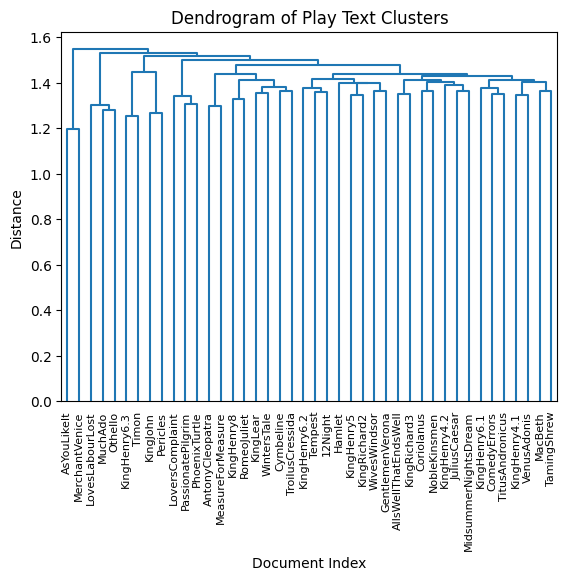

In [ ]:
# Perform linkage calculation using Ward's method (or another method if preferred)
linkage = sch.linkage(X, method='ward')

# Create a dendrogram object
dendrogram = sch.dendrogram(linkage, labels=playTitles)  # Use playTitles for labels

# Customize and display the dendrogram
plt.xlabel("Document Index")
plt.ylabel("Distance")
plt.title("Dendrogram of Play Text Clusters")
plt.show()
